# Plant Seedings
https://www.kaggle.com/c/plant-seedlings-classification

In [1]:
# Shell script for preparing data
# cd data
# mkdir plantseedings
# cd plantseedings
# kg download -u <username> -p <password> -c plant-seedlings-classification -f sample_submission.csv.zip
# kg download -u <username> -p <password> -c plant-seedlings-classification -f test.zip
# kg download -u <username> -p <password> -c plant-seedlings-classification -f train.zip

# unzip -q sample_submission.csv.zip
# unzip -q test.zip
# unzip -q train.zip

In [4]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
from fastai.imports import *

In [7]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

# Build the model

Since the evaluation metric of the competition is mean f1 score, let's add it to our metrics list.

In [8]:
from sklearn.metrics import f1_score

def f1(preds, targs):
    return f1_score(targs, np.argmax(preds, axis=1), average='micro')
    
metrics = [f1]

In [9]:
PATH= "data/plantseedings/"
sz = 224
bs = 64

#  Build model

In [10]:
arch = resnet50
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.1)

data = ImageClassifierData.from_paths(PATH, bs=bs, tfms=tfms, trn_name="train", 
                                      val_name="train", # Have to change this!!!!! It's a sin I'm committing!
                                      test_name="test")

In [11]:
torch.manual_seed(43)
learn = ConvLearner.pretrained(arch, data, precompute=True, metrics=metrics)

In [12]:
lrf = learn.lr_find()

A Jupyter Widget

 53%|█████▎    | 40/75 [00:01<00:01, 28.41it/s, loss=11.4]


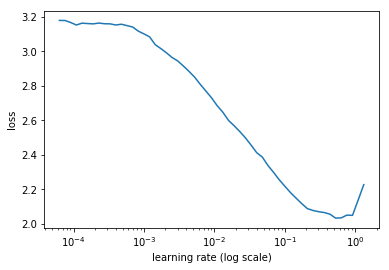

In [13]:
learn.sched.plot()

In [14]:
learn.fit(0.05, 5)

A Jupyter Widget

[ 0.       1.06297  0.50921  0.82259]                     
[ 1.       0.76098  0.32987  0.89571]                      
[ 2.       0.58301  0.27624  0.9053 ]                      
[ 3.       0.44985  0.25507  0.91777]                      
[ 4.       0.40732  0.17471  0.93872]                      



In [15]:
learn.precompute = False

In [16]:
learn.lr_find()

A Jupyter Widget

 91%|█████████ | 68/75 [00:13<00:01,  5.13it/s, loss=2.5]  

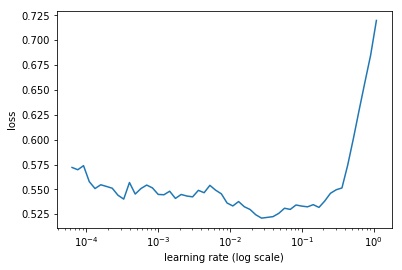

In [17]:
learn.sched.plot()

In [18]:
learn.fit(1e-3, 5, cycle_len=1)

A Jupyter Widget


 27%|██▋       | 20/75 [00:04<00:12,  4.55it/s, loss=0.626]

Exception in thread Thread-12:
Traceback (most recent call last):
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

Exception in thread Thread-13:
Traceback (most recent call last):
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeErro

[ 0.       0.5942   0.14786  0.95176]                      
[ 1.       0.56484  0.12666  0.95884]                      
[ 2.       0.5558   0.12036  0.96405]                      
[ 3.       0.5133   0.1165   0.96217]                      
[ 4.       0.49183  0.10614  0.96571]                      



In [19]:
learn.save("resnet50_224_1")

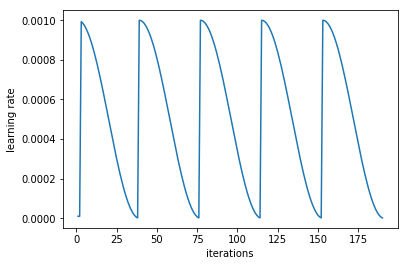

In [15]:
learn.sched.plot_lr()

In [20]:
learn.fit(1e-3, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.51273  0.10738  0.96426]                      
[ 1.       0.47839  0.11035  0.96467]                      
[ 2.       0.46249  0.10912  0.96551]                      
[ 3.       0.47456  0.10989  0.96405]                      
[ 4.       0.47916  0.11131  0.96634]                      
[ 5.       0.45032  0.10716  0.96509]                      
[ 6.       0.46541  0.10601  0.9653 ]                      



# Predict on test set

In [26]:
preds, _ = learn.TTA(is_test=True)

In [37]:
final_preds = [data.classes[x] for x in np.argmax(preds, axis=1)]
fnames = [x.split("/")[1] for x in data.test_ds.fnames]

In [39]:
final = pd.DataFrame({'file': fnames, 'species': final_preds})

f = "submit1.csv"
final.to_csv(f"{PATH}{f}", index=False)

from IPython.display import FileLink
FileLink(f"{PATH}{f}")

/home/ubuntu/fastai/courses/dl1/data/plantseedings/submit1.csv